In [1]:
import pypylon.pylon as py
import cv2
#import os

In [2]:
#os.environ['PYLON_CAMEMU'] = '1'

### Getting all Basler cameras connected

In [2]:
tlf = py.TlFactory.GetInstance()
devices = tlf.EnumerateDevices()
devices

(<pypylon.pylon.DeviceInfo; proxy of <Swig Object of type 'Pylon::CDeviceInfo *' at 0x000001FEC1895740> >,)

In [3]:
device = devices[0]
device

<pypylon.pylon.DeviceInfo; proxy of <Swig Object of type 'Pylon::CDeviceInfo *' at 0x000001FEC1895740> >

In [4]:
device.GetFullName()

'\\\\?\\usb#vid_2676&pid_ba06&mi_00#8&708a5de&0&0000#{79bfeeca-947f-11e1-bc58-001b2163ef96}'

In [5]:
device.GetFriendlyName()

'Basler daA1440-220um (40486089)'

In [6]:
device.GetDeviceID()

'N/A'

## Configuring the camera

1. Exposure Time: 4000 micro second
2. Device link throughput limit: Off


Note: To setup video writer, we also need the following

1. Frame Width
2. Frame Height
3. Acquisition Frame Rate

In [8]:
# Creating camera instance and opening the camera. HAS TO BE DONE BEFORE CONFIGURATION
# Pylon Viewer should not be open

cd = tlf.CreateDevice(device)
cam = py.InstantCamera(cd)
cam.Open()

In [11]:
cam.CounterValue.Value

0

In [9]:
cam.Width.Value = 1440
cam.Height.Value = 1080
cam.AcquisitionFrameRateEnable.Value = True
cam.AcquisitionFrameRate.Value = 200
cam.ExposureTime.Value = 4000
cam.DeviceLinkThroughputLimitMode.Value = "Off"

In [12]:
res = cam.GrabOne(1000)
cam.Close()

In [11]:
res.GetHeight()

1080

In [12]:
image = res.Array

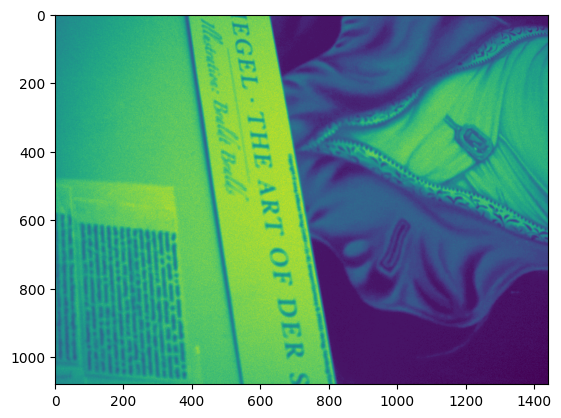

In [13]:
import matplotlib.pyplot as plt
plt.imshow(image)

## Saving Video

1. Setting up video writer
2. Saving in a loop

In [14]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video_writer = cv2.VideoWriter('output.avi', fourcc, fps=200, frameSize=(1440, 1080))

In [15]:
cam.StartGrabbingMax(400)

while cam.IsGrabbing():
    res = cam.RetrieveResult(1000)
    image = cv2.cvtColor(res.Array, cv2.COLOR_GRAY2BGR)
    video_writer.write(image)
    res.Release()
cam.Close()
video_writer.release()